## Q-1 Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file. 

#### Approach Used : 
#### > Installed all the important libraries
#### > Pulled All_stock file first and then wrote a code to pull all the files from the root location and storing it to a dictionary where Key is stock name and valye is its dataframe

In [1]:
### Importing all the library

import seaborn as sns

import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import style
%matplotlib inline

In [3]:
## import all_stock file with date as Index
Stalk_Data = pd.read_csv("F:/UTD Drive/OneDrive - The University of Texas at Dallas/UTD/Semester 3/ProgDataScience/MidTerm/all_stocks_2006-01-01_to_2018-01-01.csv", parse_dates=True,index_col=0)
Stalk_Data.head()


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [4]:
## import all_stock file with normal index
Stalk_Data1 = pd.read_csv("F:/UTD Drive/OneDrive - The University of Texas at Dallas/UTD/Semester 3/ProgDataScience/MidTerm/all_stocks_2006-01-01_to_2018-01-01.csv")
Stalk_Data1['Year'] = pd.to_datetime(Stalk_Data1['Date']).dt.year
Stalk_Data1.head()

,Date,Open,High,Low,Close,Volume,Name,Year
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006


In [5]:
#importing all files

diff_stalks = Stalk_Data["Name"].unique()
import os
filenames = os.listdir("F:/UTD Drive/OneDrive - The University of Texas at Dallas/UTD/Semester 3/ProgDataScience/MidTerm")
d = {}
for i in range(len(filenames)):
    first = filenames[i].split('_')[0]
    if first in diff_stalks:
        d[first] = pd.read_csv(os.path.join("F:/UTD Drive/OneDrive - The University of Texas at Dallas/UTD/Semester 3/ProgDataScience/MidTerm",filenames[i]),parse_dates=True,index_col=0)


In [6]:
## this way you can access data for any stock
Microsoft = d['MSFT']
Cisco = d['CSCO']
IBM = d['IBM']
Apple = d['AAPL']
Amazon = d['AMZN']
IBM.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


## Q-2 Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.

#### Approach used: calculated plots for respective points
#### 0) calculated Normal descriptive information for the full dataset group by Year and name seperatly. 
#### 1) I wanted to check the minimum, maximum and average trend over the years(monthly) for closing price.
#### 2) Also checked which stock is the minimum and maximum in terms of closing price over the years.
#### 3) In similar way , I checked what is the maximum and low of volume over the years and named the stock
#### 4) Plotted volume for all the stocks

In [7]:
## 0)

Stalk_Data.describe()
Stalk_Data.groupby('Name').apply(lambda group: group.describe())
Stalk_Data1.groupby('Year').apply(lambda group: group.describe())

Open         High          Low        Close        Volume  \
Year                                                                           
2006 count  7781.000000  7781.000000  7781.000000  7781.000000  7.781000e+03   
     mean     52.953485    53.446549    52.472309    52.961914  2.238215e+07   
     std      40.222410    40.651323    39.753688    40.196483  4.414222e+07   
     min       7.390000     7.560000     7.170000     7.240000  6.339000e+05   
     25%      28.910000    29.250000    28.700000    28.980000  5.254200e+06   
     50%      43.560000    43.950000    43.230000    43.580000  9.152200e+06   
     75%      63.000000    63.470000    62.500000    63.040000  1.882420e+07   
     max     255.740000   256.760000   253.140000   255.080000  6.660220e+08   
2007 count  7781.000000  7781.000000  7781.000000  7781.000000  7.781000e+03   
     mean     63.787022    64.420763    63.107874    63.781723  2.539226e+07   
     std      53.250519    53.836209    52.573831    53.230528  4.859839e+07   
     min      11.860000    12.070000    11.700000    11.900000  8.894290e+05   
     25%      31.550000    31.850000    31.190000    31.510000  6.499300e+06   
     50%      50.600000    51.100000    50.040000    50.560000  1.121860e+07   
     75%      74.580000    75.070000    73.750000    74.540000  2.357717e+07   
     max     370.940000   373.990000   362.860000   371.270000  8.380367e+08   
2008 count  7843.000000  7843.000000  7843.000000  7843.000000  7.843000e+03   
     mean     55.709486    56.719194    54.632578    55.660541  3.361789e+07   
     std      46.236600    46.952101    45.392887    46.125049  5.727444e+07   
     min       9.100000     9.480000     0.010000     8.950000  8.612270e+05   
     25%      26.090000    26.605000    25.520000    26.050000  9.031612e+06   
     50%      42.840000    43.910000    41.890000    42.740000  1.548884e+07   
     75%      69.895000    70.855000    68.725000    69.805000  3.334547e+07   
     max     346.780000   349.030000   339.200000   343.010000  8.432640e+08   
2009 count  7811.000000  7811.000000  7811.000000  7811.000000  7.811000e+03   
     mean     49.323092    49.982934    48.680302    49.376502  2.854346e+07   
     std      44.207007    44.666800    43.803284    44.281235  3.827324e+07   
     min       6.750000     7.170000     0.000000     6.660000  8.586200e+05   
     25%      21.920000    22.320000    21.530000    21.955000  8.586276e+06   
     50%      34.570000    35.300000    33.950000    34.660000  1.482800e+07   
...                 ...          ...          ...          ...           ...   
2014 std     103.785732   104.564078   102.706588   103.644047  1.783726e+07   
     min      21.340000    21.620000    21.270000    21.350000  5.403180e+05   
     25%      47.140000    47.505000    46.750000    47.217500  3.853572e+06   
     50%      86.520000    87.120000    85.885000    86.470000  6.832322e+06   
     75%     109.992500   110.625000   109.277500   109.790000  1.696103e+07   
     max     614.010000   615.050000   609.910000   610.700000  6.182376e+08   
2015 count  7812.000000  7812.000000  7812.000000  7812.000000  7.812000e+03   
     mean    115.428219   116.407720   114.388994   115.418111  1.345824e+07   
     std     125.092197   126.310701   123.786086   125.077308  1.759161e+07   
     min      22.840000    23.650000    19.370000    23.270000  5.073170e+05   
     25%      49.005000    49.367500    48.595000    49.077500  4.070422e+06   
     50%      86.230000    86.995000    85.455000    86.215000  7.618670e+06   
     75%     117.535000   118.505000   116.322500   117.602500  1.600636e+07   
     max     793.960000   798.690000   787.200000   793.960000  4.309498e+08   
2016 count  7812.000000  7812.000000  7812.000000  7812.000000  7.812000e+03   
     mean    128.154400   129.168990   127.113557   128.194009  1.192749e+07   
     std     164.787404   166.060986   163.274792   164.693312  1.293844e+07   
     min      22.60

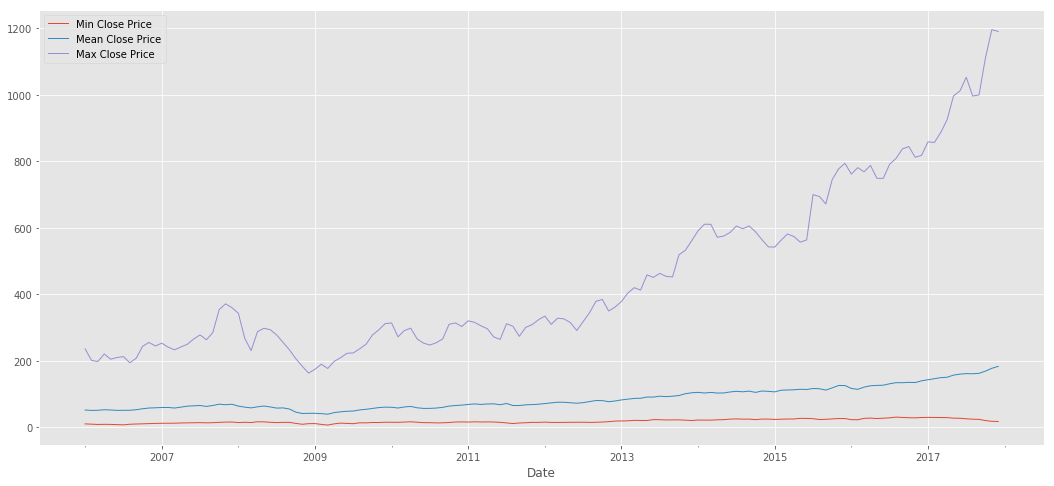

In [11]:
## 1) min,max and mean close price over the years
style.use('ggplot')

## you can resample the data for Years(Y), Months(M), quarters(Q) and so on
Stalk_Data['Close'].resample('M').min().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'Min Close Price')
Stalk_Data['Close'].resample('M').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'Mean Close Price')
Stalk_Data['Close'].resample('M').max().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'Max Close Price')


In [9]:
## 2) finding stocks having min,max close price over the years

df_max = Stalk_Data1.groupby(['Year'], as_index = False)['Close'].max()
highest_close = pd.merge(df_max, Stalk_Data1, how = 'left', on =['Close', 'Year'] )

df_min = Stalk_Data1.groupby(['Year'], as_index = False)['Close'].min()
Minimum_Close = pd.merge(df_min, Stalk_Data1, how = 'left', on =['Close', 'Year'] )

highest_close.head()
Minimum_Close.head()

,Year,Close,Date,Open,High,Low,Volume,Name
0,2006,7.24,2006-07-14,7.50,7.56,7.17,248258745,AAPL
1,2007,11.90,2007-02-09,12.27,12.31,11.89,215234936,AAPL
2,2007,11.90,2007-01-26,12.00,12.08,11.86,10981600,NKE
3,2008,8.95,2008-11-20,9.10,10.01,8.94,37316961,AABA
4,2009,6.66,2009-03-05,6.75,7.17,6.52,445327128,GE


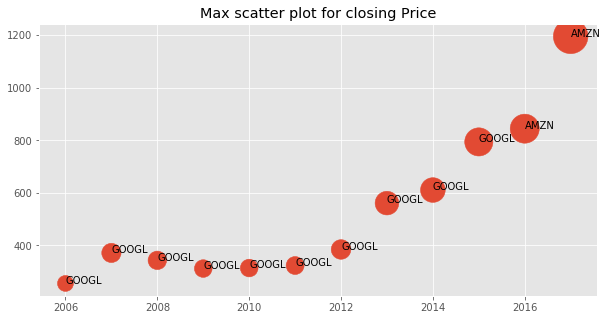

In [12]:
## plot for maximum close price
## AMAZON has the maximum close price over the year
x = highest_close['Year']
y = highest_close['Close']
n = highest_close['Name']

fig, ax = plt.subplots(figsize=(10, 5))
#plt.figure(figsize=(8, 8))
ax.scatter(x, y, s=y)
plt.title('Max scatter plot for closing Price')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

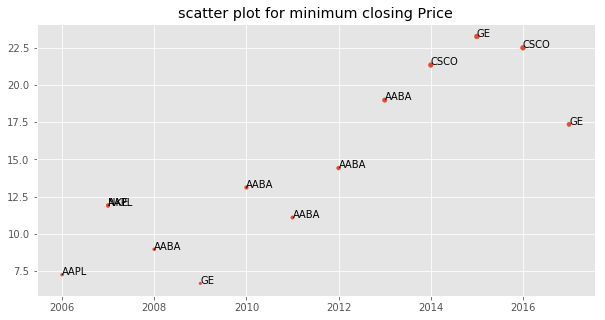

In [13]:
## plot for minimum close price
## GE has the minimum close price in year 2009

x = Minimum_Close['Year']
y = Minimum_Close['Close']
n = Minimum_Close['Name']

fig, ax = plt.subplots(figsize=(10, 5))
#plt.figure(figsize=(8, 8))
ax.scatter(x, y, s=y)
plt.title('scatter plot for minimum closing Price')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

In [14]:
## 3) finding stocks having min,max volume over the years

Vol_max = Stalk_Data1.groupby(['Year'], as_index = False)['Volume'].max()
highest_vol = pd.merge(Vol_max, Stalk_Data1, how = 'left', on =['Volume', 'Year'] )

Vol_min = Stalk_Data1.groupby(['Year'], as_index = False)['Volume'].min()
Minimum_vol = pd.merge(Vol_min, Stalk_Data1, how = 'left', on =['Volume', 'Year'] )

highest_vol.head()
Minimum_vol.head()

,Year,Volume,Date,Open,High,Low,Close,Name
0,2006,633900,2006-07-03,44.83,45.06,44.66,45.03,TRV
1,2007,889429,2007-12-24,85.52,86.54,85.30,86.26,MMM
2,2008,861227,2008-12-24,41.80,41.84,41.17,41.66,TRV
3,2009,858620,2009-12-24,306.77,310.07,306.44,309.55,GOOGL
4,2010,989479,2010-12-30,299.30,300.97,298.99,299.73,GOOGL


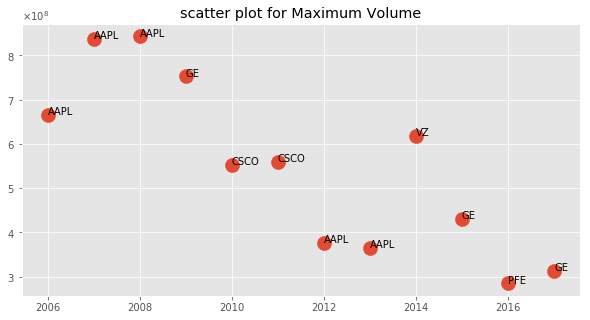

In [15]:
## plot for maximum Volume
## Apple was traded maximum times in 2008

x = highest_vol['Year']
y = highest_vol['Volume']
n = highest_vol['Name']

fig, ax = plt.subplots(figsize=(10, 5))
#plt.figure(figsize=(8, 8))
ax.scatter(x, y, s=200)
plt.title('scatter plot for Maximum Volume')

plt.ticklabel_format(useMathText = True,axis='y')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

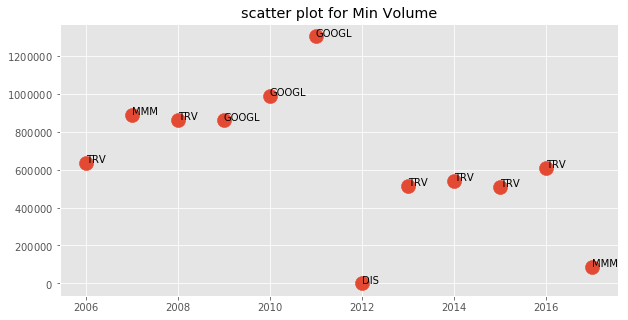

In [16]:
## plot for minimum Volume
## DIS was traded minimum times in 2012

x = Minimum_vol['Year']
y = Minimum_vol['Volume']
n = Minimum_vol['Name']

fig, ax = plt.subplots(figsize=(10, 5))
#plt.figure(figsize=(8, 8))
ax.scatter(x, y, s=200)
plt.title('scatter plot for Min Volume')

plt.ticklabel_format(useMathText = True,axis='y')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

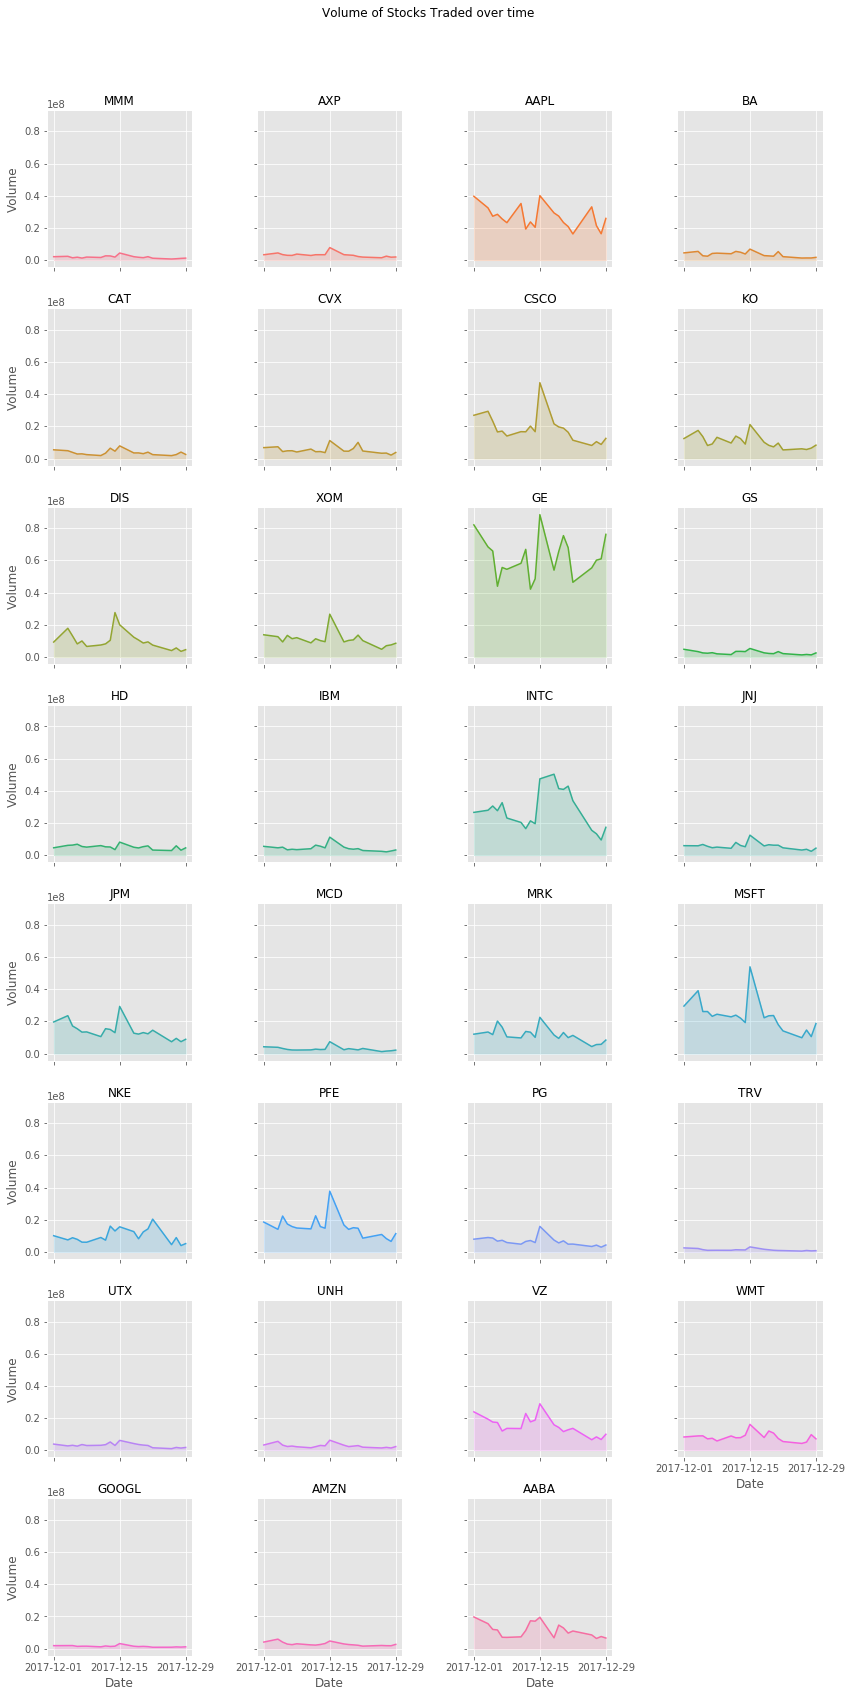

In [17]:
### 4) 
## Comparing Major Stocks (in terms of volume) in December 2017 using Facet Grid

# Subsetting the data
all_stock_2 = Stalk_Data['2017-12-01':][['Volume','Name']]

all_stock_2.reset_index(inplace = True)

# Plotting the data Using Facet Grid
g = sns.FacetGrid(all_stock_2, col='Name', hue='Name', col_wrap=4 )
g = g.map(plt.plot, 'Date', 'Volume')
g = g.map(plt.fill_between, 'Date', 'Volume', alpha=0.2).set_titles("{col_name} Name")
g = g.set_titles("{col_name}")
g = g.set(xticks=['2017-12-01','2017-12-15','2017-12-29'])
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Volume of Stocks Traded over time')



## Q-3 You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis.

#### Approach Used:

### Taking Microsoft stock data for the analysis
#### > things I have done for the analysis:
####  Descriptive analysis
#### Finding yearly, Quarterly, monthly and weekly mean of close price For Microsoft.
#### Finding yearly, Quarterly, monthly and weekly Maximum and minimum values of close price For Microsoft.
#### Calculated and ploting moving average for 21 days, 60 days and 90 days.
#### Calculated log change of close price which is called Instantaneous rate of return
#### Calculated volatility of close price which means how much close price are changing over the years. Reason given in comments
#### Calculated price analysis 
#### Plotting the Candlestick Graph of Microsoft

#### Comapred Close price of Microsoft with Cisco as mentioned in the question


In [18]:
### Taking Microsoft stock data for the analysis

Microsoft = d['MSFT']
Microsoft.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


In [19]:
## Descriptive analysis
Microsoft.info()
Microsoft.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,36.496817,36.827903,36.173190,36.513412,5.161762e+07
std,14.683337,14.742483,14.620057,14.694656,3.114958e+07
min,15.200000,15.620000,14.870000,15.150000,7.425603e+06
25%,26.785000,27.045000,26.535000,26.835000,3.136557e+07
50%,29.990000,30.230000,29.780000,30.000000,4.617529e+07
75%,44.545000,44.980000,44.090000,44.400000,6.322291e+07
max,87.120000,87.500000,86.230000,86.850000,5.910786e+08


In [20]:
## Finding yearly mean of close price of Microsoft

Microsoft.Close.resample('Y').mean()
#Microsoft.Close.resample('M').mean()

Date
2006-12-31    26.290359
2007-12-31    30.446813
2008-12-31    26.647510
2009-12-31    22.976786
2010-12-31    27.050000
2011-12-31    26.051508
2012-12-31    29.820440
2013-12-31    32.491468
2014-12-31    42.453333
2015-12-31    46.713968
2016-12-31    55.259325
2017-12-31    71.984024
Freq: A-DEC, Name: Close, dtype: float64

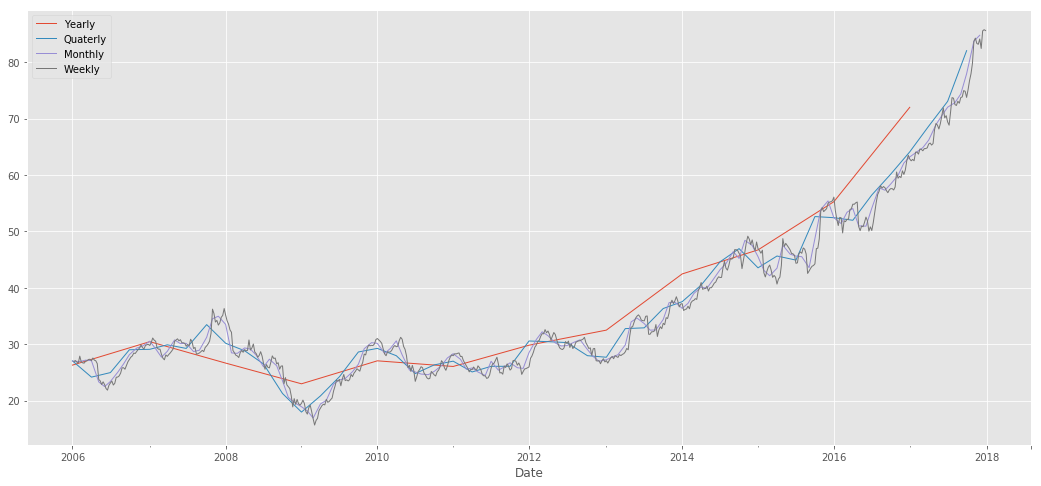

In [21]:
### Plotting yearly,quarterly, monthly and weekly mean of close price for Microsoft

Microsoft.Close.resample('Y').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'Yearly')
Microsoft.Close.resample('Q').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'Quaterly')
Microsoft.Close.resample('M').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'Monthly')
Microsoft.Close.resample('W').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'Weekly')

In [22]:
## Max and min close price for microsoft

Microsoft.Close.resample('Y').max()
#Microsoft.Close.resample('M').min()

Date
2006-12-31    30.19
2007-12-31    37.06
2008-12-31    35.37
2009-12-31    31.39
2010-12-31    31.39
2011-12-31    28.87
2012-12-31    32.85
2013-12-31    38.94
2014-12-31    49.61
2015-12-31    56.55
2016-12-31    63.62
2017-12-31    86.85
Freq: A-DEC, Name: Close, dtype: float64

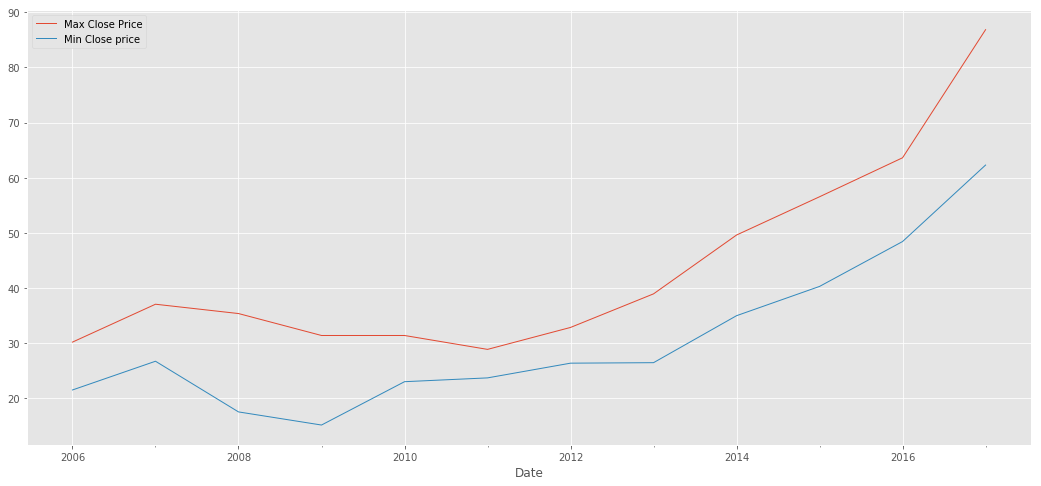

In [23]:
## plotting min and max for Microsft over the years

Microsoft.Close.resample('Y').max().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'Max Close Price')
Microsoft.Close.resample('Y').min().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'Min Close price')

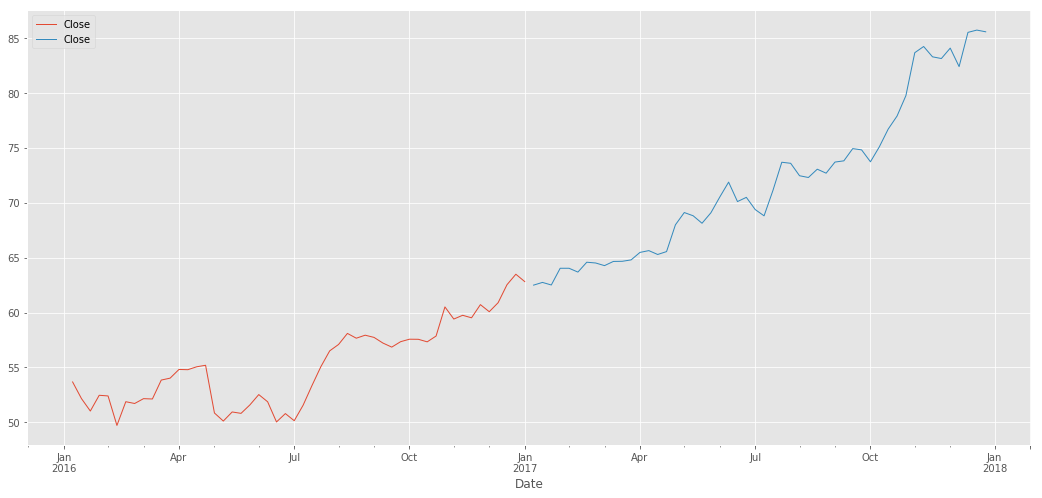

In [24]:
### Close price Mean for Single year. you can change the year according to your choice

#Microsoft['2015'].Close.resample('W').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True')
Microsoft['2016'].Close.resample('W').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True')
Microsoft['2017'].Close.resample('W').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True')

In [25]:
### Moving Average for 21 days, 60 days and 90 days
Microsoft["MA_21"] = Microsoft.Close.rolling(21, min_periods=0).mean()
Microsoft["MA_60"] = Microsoft.Close.rolling(60).mean()
Microsoft["MA_90"] = Microsoft.Close.rolling(90).mean()

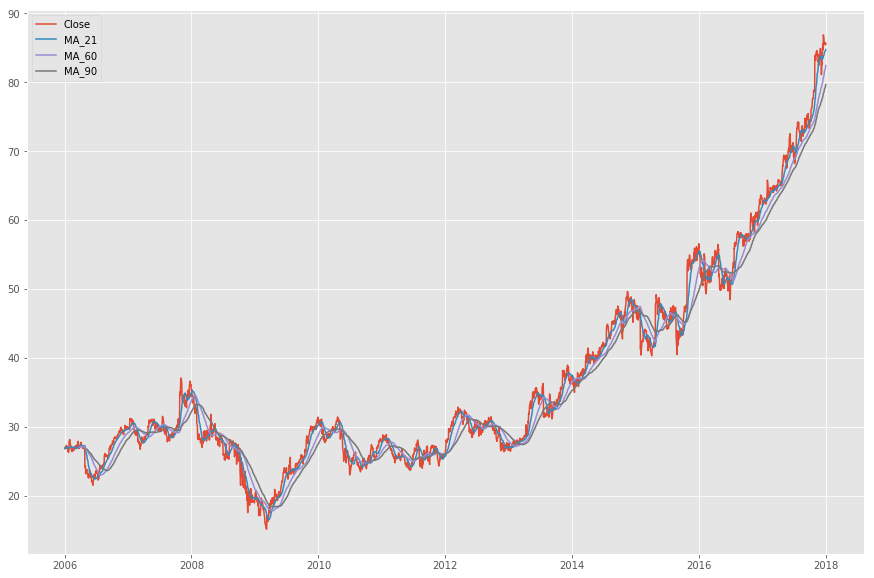

In [26]:
### Ploting moving average
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(Microsoft["Close"],label='Close')
plt.plot(Microsoft["MA_21"],label='MA_21')
plt.plot(Microsoft["MA_60"],label='MA_60')
plt.plot(Microsoft["MA_90"],label='MA_90')
plt.legend(loc=2)

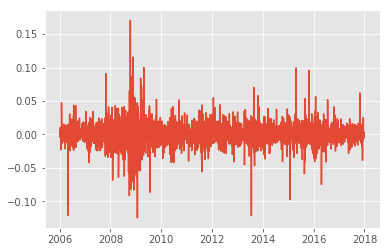

In [27]:
#compute the log change(instantanious rate of return)

Microsoft["change"]=np.log(Microsoft["Close"]/Microsoft["Close"].shift())
plt.plot(Microsoft.change) ## plot reveals noisy data centered around zero

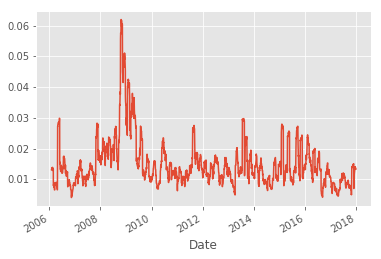

In [28]:
### finding Volitility that is how much prices are changing

### There is a sudden change between 2008 to 2010. 
### this is due to recession in 2008

Microsoft["Volatility"]= Microsoft.change.rolling(21).std().shift()
Microsoft["Volatility"].plot()

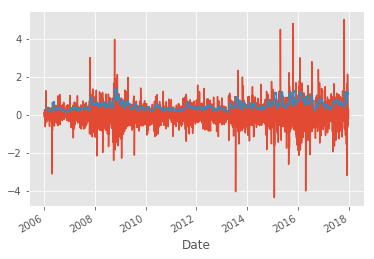

In [29]:
### price analysis 

Microsoft["actual_change"]= Microsoft["Close"]-Microsoft["Close"].shift(1)
Microsoft["exp_change"] = Microsoft["Close"].shift(1)*Microsoft["Volatility"]
Microsoft["actual_change"].plot()
Microsoft["exp_change"].plot()

#Microsoft.head(10)
#Microsoft["magnitude"] = Microsoft["actual_change"] / Microsoft["exp_change"]
#plt.hist(Microsoft["magnitude"])

In [30]:
# Importing the required Libraries
import plotly.plotly as py

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go
from datetime import datetime

init_notebook_mode(connected=True)

In [31]:
# Plotting the Candlestick plot using Plotly
#Microsoft.set_index('Date', inplace=True)

trace = go.Candlestick(x=Microsoft.index,
                       open=Microsoft.Open,
                       high=Microsoft.High,
                       low=Microsoft.Low,
                       close=Microsoft.Close)
data = [trace]

layout = {
    'title': 'Microsoft Stock Price Movement',
    'yaxis': {'title': 'Microsoft Price'},
}
fig = dict(data=data, layout=layout)

iplot(fig, filename='simple_candlestick')

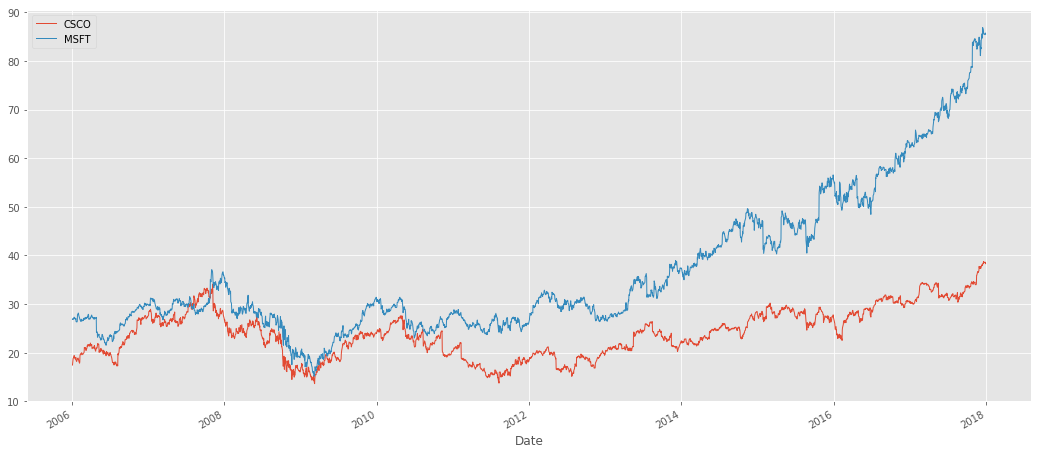

In [32]:
## Comapred Close price of Microsoft with Cisco

Microsoft = d['MSFT']
Cisco = d['CSCO']

Microsoft.sort_index()
Cisco.sort_index()

#IBM.sort_values(by='Date')
temp = pd.DataFrame({'MSFT': Microsoft["Close"],
                      'CSCO': Cisco["Close"]
                      })
temp.plot(figsize=(18,8),lw=1 ,grid = True,legend='True')

## Q-4 Take five stocks of your choice and create the same type of report stated in question 3.


### Approach :

#### Compared close price for 5 Stock prices
#### Comparing Stock Volumes of Apple, Goolge, Amazon, and Microsoft traded per day for December 2017
#### Calculated and plotted Max values for five different stocks over the years
#### Calculated and plotted Mean values for five different stocks over the years
#### Calculated and plotted standard deviation values for five different stocks over the years

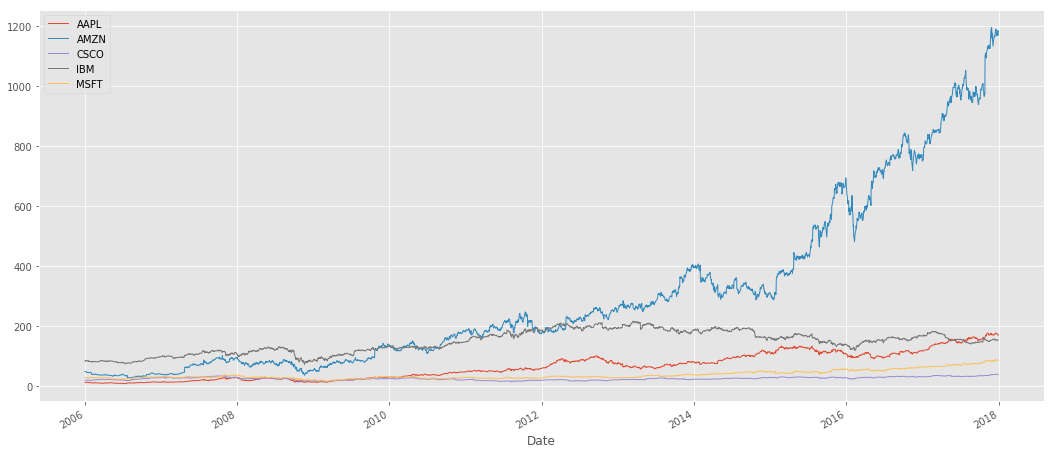

In [33]:
### Compared close price for 5 Stock prices

Microsoft = d['MSFT']
Cisco = d['CSCO']
IBM = d['IBM']
Apple = d['AAPL']
Amazon = d['AMZN']

Microsoft.sort_index()
Cisco.sort_index()
IBM.sort_index()
Apple.sort_index()
Amazon.sort_index()

temp = pd.DataFrame({ 'MSFT': Microsoft["Close"],
                      'CSCO': Cisco["Close"],
                      'IBM' : IBM["Close"],
                      'AAPL': Apple["Close"],
                      'AMZN': Amazon["Close"]
                      })
temp.plot(figsize=(18,8),lw=1 ,grid = True,legend='True')

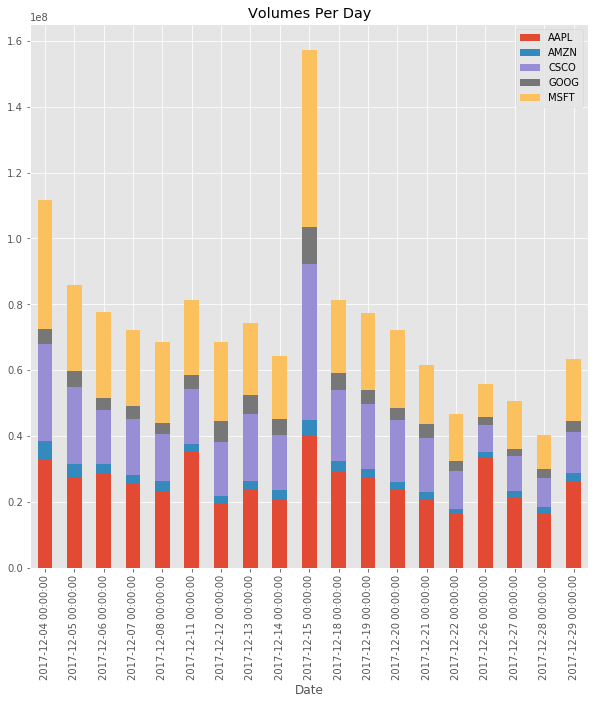

In [34]:
Microsoft = d['MSFT']
Cisco = d['CSCO']
IBM = d['IBM']
Apple = d['AAPL']
Amazon = d['AMZN']


## Comparing Stock Volumes of Apple, Goolge, Amazon, and Microsoft traded per day for December 2017

# Reading the Volume data for the major stocks
volumes = pd.DataFrame({"AAPL": Apple["Volume"],
                      "MSFT": Microsoft["Volume"],
                      "AMZN": Amazon["Volume"],
                       "CSCO": Cisco["Volume"], 
                      "GOOG": IBM["Volume"]})

# Plotting 
volumes.reset_index(inplace=True)
volumes2 = volumes[volumes['Date']>'2017-12-01']
volumes2.set_index('Date',inplace=True)
volumes2.plot.bar(stacked=True,figsize=(10,10), title="Volumes Per Day")

In [35]:
# result['Daily_Return_IBM'] = IBM['Close'].pct_change()
# result['Daily_Return_AAPL'] = Apple['Close'].pct_change()
# result['Daily_Return_CSCO'] = Cisco['Close'].pct_change()
# ##result['Daily_Return_MSFT'] = Microsoft['Close'].pct_change()
# ##result['Daily_Return_AMZN'] = Amazon['Close'].pct_change()

# result['Daily_Return_IBM'].fillna(value=result['Daily_Return_IBM'].mean(), inplace=True)
# result['Daily_Return_AAPL'].fillna(value=result['Daily_Return_AAPL'].mean(), inplace=True)
# result['Daily_Return_CSCO'].fillna(value=result['Daily_Return_CSCO'].mean(), inplace=True)
# result.plot(x='Daily_Return_AAPL',y='Daily_Return_IBM')

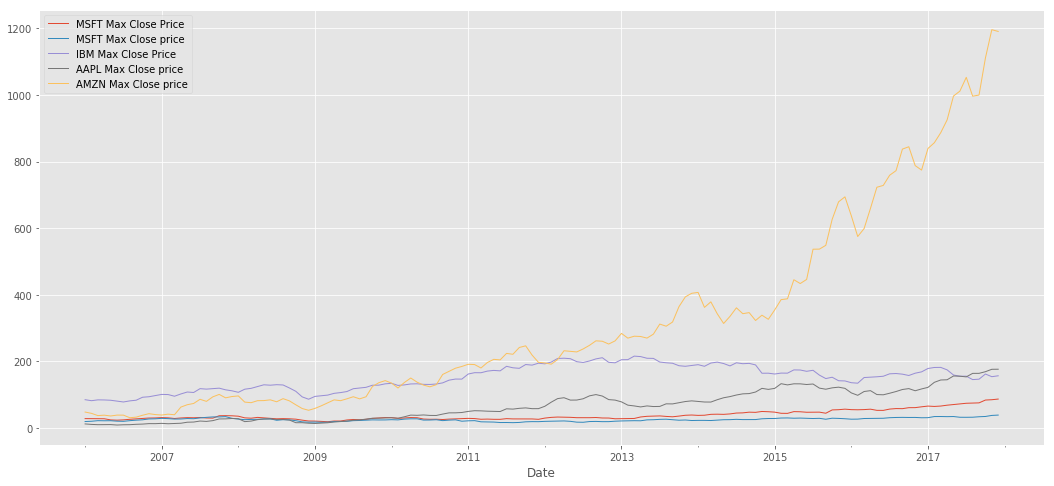

In [36]:
Microsoft = d['MSFT']
Cisco = d['CSCO']
IBM = d['IBM']
Apple = d['AAPL']
Amazon = d['AMZN']

### plotting max of close price over the years

Microsoft.Close.resample('M').max().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'MSFT Max Close Price')
Cisco.Close.resample('M').max().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'MSFT Max Close price')
IBM.Close.resample('M').max().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'IBM Max Close Price')
Apple.Close.resample('M').max().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'AAPL Max Close price')
Amazon.Close.resample('M').max().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'AMZN Max Close price')


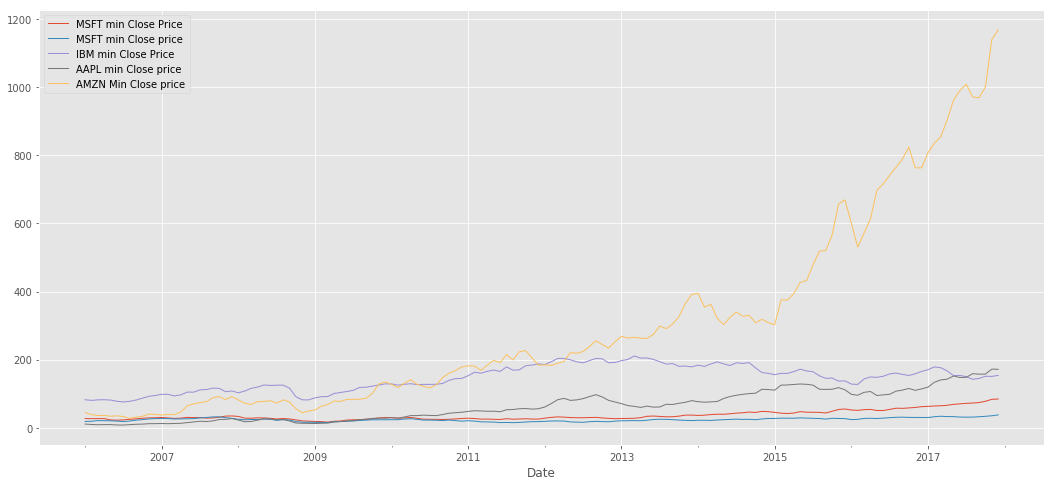

In [37]:
### Plotting Average close price

Microsoft.Close.resample('M').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'MSFT min Close Price')
Cisco.Close.resample('M').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'MSFT min Close price')
IBM.Close.resample('M').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'IBM min Close Price')
Apple.Close.resample('M').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'AAPL min Close price')
Amazon.Close.resample('M').mean().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'AMZN Min Close price')

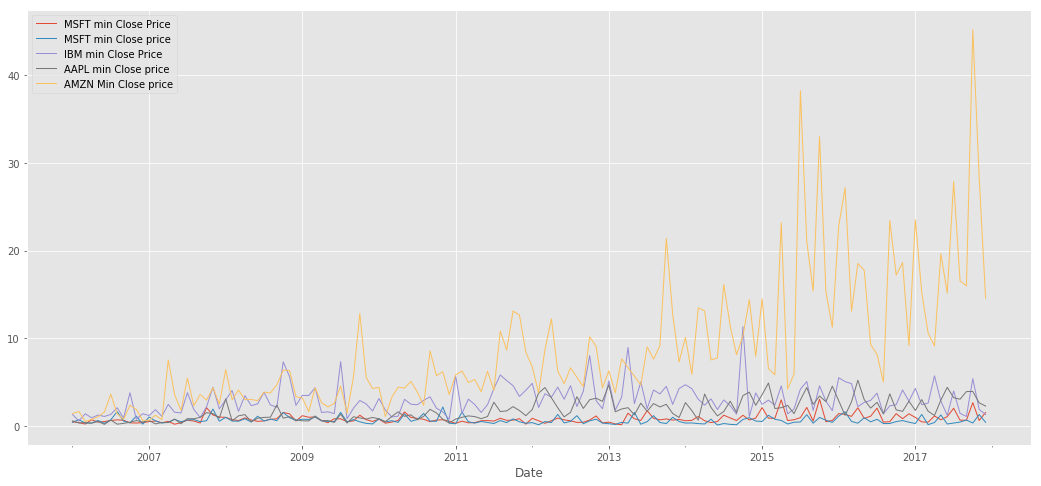

In [38]:
#### Ploting Standard deviation

Microsoft.Close.resample('M').std().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'MSFT min Close Price')
Cisco.Close.resample('M').std().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'MSFT min Close price')
IBM.Close.resample('M').std().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'IBM min Close Price')
Apple.Close.resample('M').std().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'AAPL min Close price')
Amazon.Close.resample('M').std().plot(figsize=(18,8),lw=1 ,grid = True,legend='True', label = 'AMZN Min Close price')